In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.1 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
import numpy as np

# Set the number of days for which to generate data
num_days = 10

# Set the number of hours in a day
num_hours = 24

# Set the mean and standard deviation for the random data
mean = 100
std_dev = 10

# Generate the random pattern for a single day
pattern = np.zeros(num_hours)
for hour in range(num_hours):
    if hour < 6 or hour > 20:
        pattern[hour] -= 30
    elif hour < 10:
        pattern[hour] += 10
    elif hour < 14:
        pattern[hour] -= 10
    elif hour < 18:
        pattern[hour] += 20
    else:
        pattern[hour] -= 10
pattern = np.cumsum(pattern)
pattern -= pattern[0]

# Replicate the pattern for all days with some random variation
data = np.zeros((num_days, num_hours))
for day in range(num_days):
    daily_mean = np.random.normal(mean, std_dev)
    variation = np.random.normal(0, std_dev/2, num_hours)
    data[day] = pattern * daily_mean/mean + variation
    data[day] -= data[day][0] # start at 0
    data[day] -= data[day][-1] # end at 0
    data[day] -= np.min(data[day]) # start at 0
    data[day][0] = 0 
# Print the generated data
print(data)


[[  0.         190.18780282 159.79191445 126.86679825  92.66037716
   52.82798957  63.78660661  71.64692021  82.91769558 102.28408358
   80.74339567  74.0341996   57.42731666  63.72844372  81.90306419
  100.91696481 126.65884049 152.13784702 139.79055085 118.35573482
  112.47281805  70.78414164  45.40252068   0.        ]
 [  0.         134.13427039 113.77479406  88.10342165  56.92593395
   34.22596474  40.94212941  56.56115183  64.7167284   65.34335031
   52.06094719  47.50921581  44.44431228  28.52415246  49.55735307
   72.47382715  90.68322667  95.0770972   95.92414472  88.50654896
   76.90683764  48.56602839  22.72143716   0.        ]
 [  0.         177.63748852 137.87071105 113.62138868  76.90950016
   39.69348461  52.80737406  75.84627125  80.07403832  91.63257806
   74.09176796  63.07439796  58.16072934  42.14460873  53.70100236
   87.14415239 107.77400542 126.15134738 122.08874452 104.11880011
  100.08299899  62.96613733  37.64848342   0.        ]
 [  0.         131.61456108 108

In [ ]:
import pandas as pd
import statsmodels.api as sm

date_range = pd.date_range(start='2023-03-28', periods=num_days, freq='D')
hourly_range = pd.date_range(start='00:00', end='23:00', freq='H').time

# Flatten the data array and create a new DataFrame with hourly timestamps for each day
new_data = data.ravel()
new_index = pd.date_range(start='2023-03-28', end='2023-04-06 23:00', freq='H')

new_df = pd.DataFrame({'Requests': new_data}, index=new_index)

# Print the resulting DataFrame
print(new_df)

                       Requests
2023-03-28 00:00:00    0.000000
2023-03-28 01:00:00  190.187803
2023-03-28 02:00:00  159.791914
2023-03-28 03:00:00  126.866798
2023-03-28 04:00:00   92.660377
...                         ...
2023-04-06 19:00:00  107.332652
2023-04-06 20:00:00  105.480069
2023-04-06 21:00:00   65.493780
2023-04-06 22:00:00   34.508671
2023-04-06 23:00:00    0.000000

[240 rows x 1 columns]


In [ ]:
# Convert negative request values to zero
new_df.loc[new_df['Requests'] < 0, 'Requests'] = 0
new_df

,Requests
2023-03-28 00:00:00,0.000000
2023-03-28 01:00:00,190.187803
2023-03-28 02:00:00,159.791914
2023-03-28 03:00:00,126.866798
2023-03-28 04:00:00,92.660377
...,...
2023-04-06 19:00:00,107.332652
2023-04-06 20:00:00,105.480069
2023-04-06 21:00:00,65.493780
2023-04-06 22:00:00,34.508671


In [151]:
index = new_df.index

print(index)

DatetimeIndex(['2023-03-28 00:00:00', '2023-03-28 01:00:00',
               '2023-03-28 02:00:00', '2023-03-28 03:00:00',
               '2023-03-28 04:00:00', '2023-03-28 05:00:00',
               '2023-03-28 06:00:00', '2023-03-28 07:00:00',
               '2023-03-28 08:00:00', '2023-03-28 09:00:00',
               ...
               '2023-04-06 14:00:00', '2023-04-06 15:00:00',
               '2023-04-06 16:00:00', '2023-04-06 17:00:00',
               '2023-04-06 18:00:00', '2023-04-06 19:00:00',
               '2023-04-06 20:00:00', '2023-04-06 21:00:00',
               '2023-04-06 22:00:00', '2023-04-06 23:00:00'],
              dtype='datetime64[ns]', length=240, freq='H')


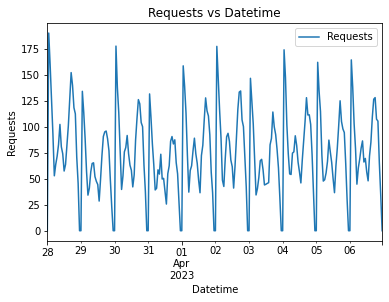

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming that your DataFrame is named 'df', you can use the following code to plot the data:
new_df.plot()

# Set the x-axis label
plt.xlabel('Datetime')

# Set the y-axis label
plt.ylabel('Requests')

# Set the title
plt.title('Requests vs Datetime')

# Display the plot
plt.show()


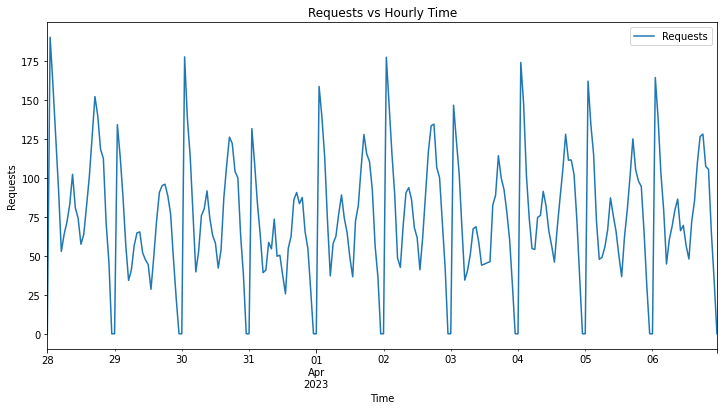

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming that your DataFrame is named 'df', you can use the following code to resample the data:
hourly_data = new_df.resample('H').mean()
fig, ax = plt.subplots(figsize=(12, 6))

# Use the 'plot' method to create a line plot of the hourly data
hourly_data.iloc[:].plot(ax=ax)

# Set the x-axis label
plt.xlabel('Time')

# Set the y-axis label
plt.ylabel('Requests')

# Set the title
plt.title('Requests vs Hourly Time')

# Display the plot
plt.show()


In [47]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(new_df['Requests'])
print('ADF Statistic: %f' % result[0])
print('p-value: %.21f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1]<=0.05:
  print("strong evidence against null hypothesis, so stationary")
else:
  print("weak evidence against null hypothesis, so not stationary")

ADF Statistic: -10.906177
p-value: 0.000000000000000000113
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
strong evidence against null hypothesis


## If not stationary, you need to apply differencing

In [48]:
import pandas

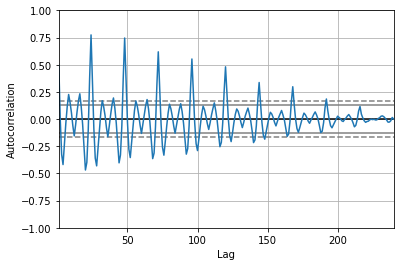

In [50]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(new_df['Requests'])
plt.show()

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

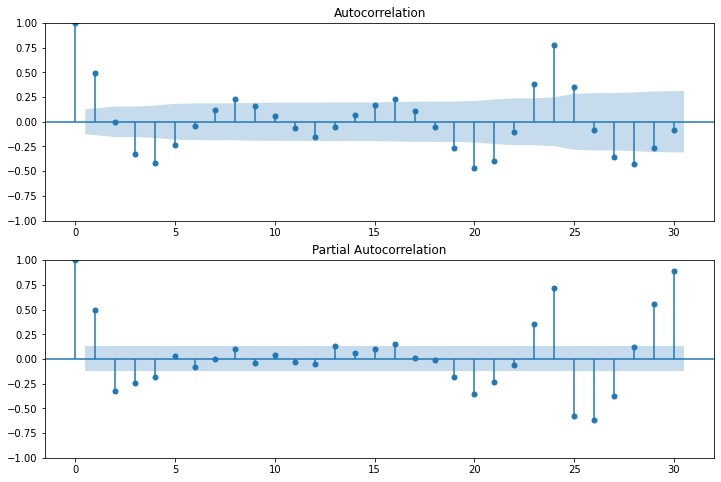

In [57]:
fig= plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(new_df['Requests'],lags=30,ax=ax1)
ax2= fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(new_df['Requests'],lags=30,ax=ax2)


In [127]:
training = new_df.iloc[:168,:]
test= new_df.iloc[168:,:]

In [128]:
#SARIMA model
model = auto_arima(training['Requests'], seasonal=True, m=24, suppress_warnings=True)
# Print the model summary
print(model.summary())

/usr/local/lib/python3.9/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,0,0)(2,0,2)[24] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.9/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.9/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "/usr/local/lib/python3.9/dis

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 24)   Log Likelihood                -658.520
Date:                              Wed, 29 Mar 2023   AIC                           1327.040
Time:                                      04:57:53   BIC                           1342.660
Sample:                                  03-28-2023   HQIC                          1333.379
                                       - 04-03-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0344      0.072      0.480      0.631      -0.106       0.175
ar.L1          0.74

In [129]:
predictions, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

In [130]:
#Predictions
predictions

2023-04-04 00:00:00      0.207787
2023-04-04 01:00:00    156.545054
2023-04-04 02:00:00    130.903931
2023-04-04 03:00:00    105.282287
2023-04-04 04:00:00     73.639780
                          ...    
2023-04-06 19:00:00     99.694626
2023-04-06 20:00:00     87.696281
2023-04-06 21:00:00     61.088006
2023-04-06 22:00:00     35.311521
2023-04-06 23:00:00      1.075547
Freq: H, Length: 72, dtype: float64

<Axes: >

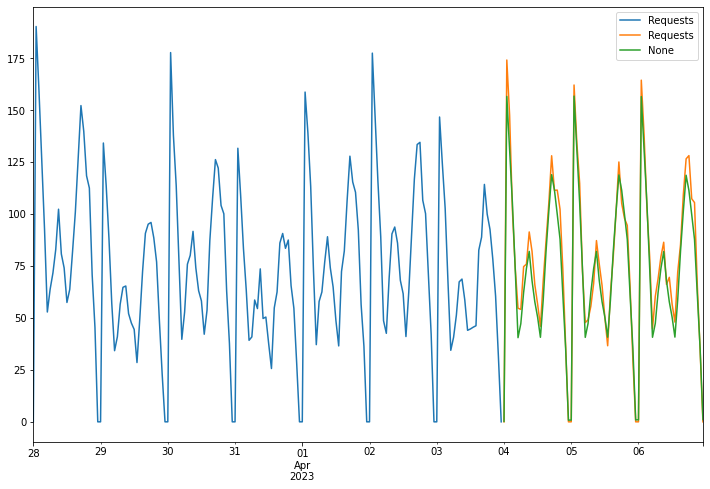

In [131]:
#Visualizations
training['Requests'].plot(figsize=(12,8),legend=True)
test['Requests'].plot(legend=True)
predictions.plot(legend = True)

In [70]:
import pickle

# assume you have an ARIMA model object named 'arima_model'
with open('arima_model.pkl', 'wb') as f:
    # dump the model object into the file
    pickle.dump(model, f)


In [202]:
import subprocess
import pandas as pd
import pickle
from datetime import datetime
# Load the trained SARIMA model

# Set the URL for the Knative service
knative_url = 'http://hello.default.34.121.210.234.sslip.io'

# Set the time interval for predictions (in minutes)
time_interval = 55

def predict_and_scale():
    # Get the current time
    #current_time = pd.Timestamp.now().ceil('H')
    current_time = pd.Timestamp(year=2023, month=4, day=6, hour=20, minute=0, second=0)

    # Generate a time index for the time interval
    time_index = pd.date_range(current_time, periods=1, freq='H')
    pred = model.predict(n_periods= 8640)
    traffic_df = pred[time_index]
    predicted_traffic = traffic_df[current_time]
    print(predicted_traffic)

    subprocess.run(['ab', '-n', str(predicted_traffic), '-c', '100', knative_url])

while True:
predict_and_scale()
    time.sleep(time_interval * 60)

87.69628108492326
